# Consumer complaints multi classification


* The dataset is from kaggle, you can check here : https://www.kaggle.com/shashwatwork/consume-complaints-dataset-fo-nlp
* We will use consumer narrative as an input and the output is 5 different product type.

> We will run 4 different modeling experiment with different models and save the best model based on evaluation metrics.



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
dataset = pd.read_csv("../input/consume-complaints-dataset-fo-nlp/complaints_processed.csv")
dataset

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162416,162416,debt_collection,name
162417,162417,credit_card,name
162418,162418,debt_collection,name
162419,162419,credit_card,name


In [3]:
dataset[dataset['narrative'] == "name"]

,Unnamed: 0,product,narrative
162415,162415,debt_collection,name
162416,162416,debt_collection,name
162417,162417,credit_card,name
162418,162418,debt_collection,name
162419,162419,credit_card,name
162420,162420,credit_reporting,name


In [4]:
dataset['product'].value_counts()

credit_reporting       91179
debt_collection        23150
mortgages_and_loans    18990
credit_card            15566
retail_banking         13536
Name: product, dtype: int64

In [5]:
dataset.isna().sum()

Unnamed: 0     0
product        0
narrative     10
dtype: int64

In [6]:
del dataset['Unnamed: 0']

In [7]:
dataset

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...
...,...,...
162416,debt_collection,name
162417,credit_card,name
162418,debt_collection,name
162419,credit_card,name


In [8]:
dataset.dropna(inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset.isna().sum()

product      0
narrative    0
dtype: int64

In [9]:
dataset

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...
...,...,...
162406,debt_collection,name
162407,credit_card,name
162408,debt_collection,name
162409,credit_card,name


In [10]:
dataset[dataset['narrative'] == "name"]

,product,narrative
162405,debt_collection,name
162406,debt_collection,name
162407,credit_card,name
162408,debt_collection,name
162409,credit_card,name
162410,credit_reporting,name


In [11]:
dataset = dataset[dataset['narrative'] != "name"]
dataset

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...
...,...,...
162400,credit_reporting,zales comenity bank closed sold account report...
162401,retail_banking,zelle suspended account without cause banking ...
162402,debt_collection,zero contact made debt supposedly resolved fou...
162403,mortgages_and_loans,zillow home loan nmls nmls actual quote provid...


In [12]:
dataset['product'].value_counts()

credit_reporting       91171
debt_collection        23145
mortgages_and_loans    18990
credit_card            15564
retail_banking         13535
Name: product, dtype: int64

In [13]:
91171-66000

25171

In [14]:
dataset[dataset['product'] == "credit_reporting"].index

Int64Index([     3,      4,      5,      6,      7,      8,      9,     13,
                19,     20,
            ...
            162378, 162384, 162387, 162388, 162389, 162391, 162393, 162395,
            162396, 162400],
           dtype='int64', length=91171)

In [15]:
# reduce credit reporting data to make dataset quite balance
np.random.seed(42)
remove_n = 66000
drop_indices = np.random.choice(dataset[dataset['product'] == "credit_reporting"].index, remove_n, replace=False)
dataset_balance = dataset.drop(drop_indices)
dataset_balance.reset_index(drop=True, inplace=True)
dataset_balance

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report made mis...
4,credit_reporting,account reported abbreviated name full name se...
...,...,...
96400,retail_banking,yr thru expecting monies account deposit dolla...
96401,retail_banking,zelle suspended account without cause banking ...
96402,debt_collection,zero contact made debt supposedly resolved fou...
96403,mortgages_and_loans,zillow home loan nmls nmls actual quote provid...


In [16]:
dataset_balance['product'].value_counts()

credit_reporting       25171
debt_collection        23145
mortgages_and_loans    18990
credit_card            15564
retail_banking         13535
Name: product, dtype: int64

In [17]:
dataset_balance['product'].value_counts() * 100/len(dataset_balance)

credit_reporting       26.109642
debt_collection        24.008091
mortgages_and_loans    19.698148
credit_card            16.144391
retail_banking         14.039728
Name: product, dtype: float64

In [18]:
# use only 20% of balanced dataset
dataset_shuffled = dataset_balance.sample(frac=0.2, random_state=42)
dataset_shuffled

,product,narrative
40398,debt_collection,received bill linebarger hogan blair sampson u...
33056,debt_collection,lived house house fall spring fist year univer...
14813,retail_banking,hello mistakenly sent wrong person cashapp per...
12687,credit_reporting,year disputed account reported year duplicatio...
27393,credit_reporting,two car loan paid early making large payment e...
...,...,...
76845,credit_reporting,synovus bank prior dispute credit report showe...
29531,credit_card,attached copy report ton account account owe a...
86548,retail_banking,today declined service md branch even though p...
62012,mortgages_and_loans,contacted spoke wxxxx expressed concern able r...


In [19]:
dataset_shuffled['product'].value_counts()

credit_reporting       4993
debt_collection        4672
mortgages_and_loans    3816
credit_card            3061
retail_banking         2739
Name: product, dtype: int64

In [20]:
len(dataset_shuffled)

19281

In [21]:
import random

In [22]:
# show random samples
random_index = random.randint(0, len(dataset_shuffled)-5)
for row in dataset_shuffled[["product", "narrative"]][random_index:random_index+5].itertuples():
    _, product, narrative = row
    print(f"Narrative: {narrative}")
    print(f"Type: \n{product}\n")
    print("-----------------------")

Narrative: credit reporting agency updated credit file car loan three credit report
Type: 
credit_reporting

-----------------------
Narrative: regarding assertion informed record promotion pnc ongoing promotion order qualify pnc promotion application must submitted using link associated offer website stated previous response application submitted promotion offered time first regarding assertion informed record promotion um informed record promotion previous response record show time application pnc record bonus offer presented yeah second want talk assertion assertion correct rest gang executive relation team really seem maintain assertion time application pnc record bonus offer presented well due foolishly releasing new information ongoing promotion basically ratted others lying regarding assertion last month promotion going thank admitting ongoing promotion sreenshots attached show credit karma since even opened account pnc also receiving email well clearly save think ever needed re

In [23]:
dataset_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19281 entries, 40398 to 19376
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   product    19281 non-null  object
 1   narrative  19281 non-null  object
dtypes: object(2)
memory usage: 451.9+ KB


In [24]:
product_categories = dataset_shuffled['product'].value_counts().keys().to_list()
product_categories

['credit_reporting',
 'debt_collection',
 'mortgages_and_loans',
 'credit_card',
 'retail_banking']

In [25]:
product_categories

['credit_reporting',
 'debt_collection',
 'mortgages_and_loans',
 'credit_card',
 'retail_banking']

In [26]:
# turn target column into category datatype
dataset_shuffled['product'] = dataset_shuffled['product'].astype("category").cat.as_ordered()
dataset_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19281 entries, 40398 to 19376
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   product    19281 non-null  category
 1   narrative  19281 non-null  object  
dtypes: category(1), object(1)
memory usage: 320.3+ KB


In [27]:
dataset_shuffled['product'].cat.categories

Index(['credit_card', 'credit_reporting', 'debt_collection',
       'mortgages_and_loans', 'retail_banking'],
      dtype='object')

In [28]:
dataset_shuffled['product'] = dataset_shuffled['product'].cat.codes
dataset_shuffled

,product,narrative
40398,2,received bill linebarger hogan blair sampson u...
33056,2,lived house house fall spring fist year univer...
14813,4,hello mistakenly sent wrong person cashapp per...
12687,1,year disputed account reported year duplicatio...
27393,1,two car loan paid early making large payment e...
...,...,...
76845,1,synovus bank prior dispute credit report showe...
29531,0,attached copy report ton account account owe a...
86548,4,today declined service md branch even though p...
62012,3,contacted spoke wxxxx expressed concern able r...


# Split data into training and validation set

In [29]:
from sklearn.model_selection import train_test_split
import numpy as np

In [30]:
X = dataset_shuffled['narrative'].to_numpy()
y = dataset_shuffled['product'].to_numpy()

In [31]:
train_text, val_text, train_label, val_label = train_test_split(X, y, test_size=0.2, random_state=42)
train_text.shape, val_text.shape, train_label.shape, val_label.shape

((15424,), (3857,), (15424,), (3857,))

In [32]:
train_label[:10]

array([2, 4, 0, 3, 1, 2, 0, 2, 2, 3], dtype=int8)

# Converting text into numbers

In [33]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [34]:
text_vectorizer = TextVectorization(max_tokens=None, standardize="lower_and_strip_punctuation", split="whitespace", 
                                   ngrams=None, output_mode="int", output_sequence_length=None, pad_to_max_tokens=True)

In [35]:
# find the average number of tokens (words)
round(sum([len(i.split()) for i in train_text])/len(train_text))

89

In [36]:
# Setup text vectorization variables
max_vocab_length = 10000
max_length = round(sum([len(i.split()) for i in train_text])/len(train_text))

text_vectorizer = TextVectorization(max_tokens=max_vocab_length, output_mode="int", output_sequence_length=max_length)

In [37]:
# fit text vectorizer to the training set
text_vectorizer.adapt(train_text)

In [38]:
# create sample sentence and tokenize it
sample_sentence = "How do I know what my current credit score is??????"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 89), dtype=int64, numpy=
array([[  1,   1,   1,  79,   1,   1, 214,   3, 147,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])>

In [39]:
random_sample = [random.choice(train_text)]
print(f"Text sample: {random_sample}")
text_vectorizer(random_sample)

Text sample: ['repeated call showing toll free call caller id answer leave message latest message said message superlative rm call debt collector please call u reference previous message similar debt collection aware suspect scam call attempt collect personal data']


<tf.Tensor: shape=(1, 89), dtype=int64, numpy=
array([[1097,   17,  226, 2601,  592,   17, 1672,  328,  298,  887,  239,
        1648,  239,   40,  239, 9651, 6472,   17,   12,  438,   48,   17,
          69,  575,  435,  239,  981,   12,   32,  413, 1602,  640,   17,
         227,  260,  215,  450,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]])>

In [40]:
# get the unique words in vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number vocab in words: {len(words_in_vocab)}")
print(f"Top 5 common words: {top_5_words}")
print(f"Least 5 common words: {bottom_5_words}")

Number vocab in words: 10000
Top 5 common words: ['', '[UNK]', 'account', 'credit', 'payment']
Least 5 common words: ['recmgmt', 'reclining', 'reclassified', 'reclaiming', 'reclaimed']


# Creating an embedding layer

In [41]:
from tensorflow.keras import layers

In [42]:
embedding = layers.Embedding(input_dim=max_vocab_length, output_dim=128, input_length=max_length)
embedding

In [43]:
random_sentence = random.choice(train_text)
print(f"Original text: \n{random_sentence}\n")
print(f"Embedded version:")
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text: 
unknown hard inquiry credit report im requested verification inquiry method verification add hard inquiry credit report company provide following proof permissible purpose written authorization proof personally initiated inquiry knowledge signed document authorizing organization view credit history therefore inquiry credit report violates fair credit reporting act section c transaction initiated consumer

Embedded version:


<tf.Tensor: shape=(1, 89, 128), dtype=float32, numpy=
array([[[-0.04036136,  0.00089899,  0.01823968, ..., -0.02208262,
          0.0313812 ,  0.02748464],
        [-0.04575812,  0.0064216 , -0.01881323, ..., -0.04567354,
         -0.04722775, -0.00023594],
        [-0.0031811 , -0.00174693, -0.0116209 , ..., -0.02578011,
         -0.00266259, -0.03142606],
        ...,
        [ 0.03110141, -0.01546222, -0.03615271, ..., -0.0110338 ,
         -0.02060084, -0.01143825],
        [ 0.03110141, -0.01546222, -0.03615271, ..., -0.0110338 ,
         -0.02060084, -0.01143825],
        [ 0.03110141, -0.01546222, -0.03615271, ..., -0.0110338 ,
         -0.02060084, -0.01143825]]], dtype=float32)>

In [44]:
sample_embed[0]

<tf.Tensor: shape=(89, 128), dtype=float32, numpy=
array([[-0.04036136,  0.00089899,  0.01823968, ..., -0.02208262,
         0.0313812 ,  0.02748464],
       [-0.04575812,  0.0064216 , -0.01881323, ..., -0.04567354,
        -0.04722775, -0.00023594],
       [-0.0031811 , -0.00174693, -0.0116209 , ..., -0.02578011,
        -0.00266259, -0.03142606],
       ...,
       [ 0.03110141, -0.01546222, -0.03615271, ..., -0.0110338 ,
        -0.02060084, -0.01143825],
       [ 0.03110141, -0.01546222, -0.03615271, ..., -0.0110338 ,
        -0.02060084, -0.01143825],
       [ 0.03110141, -0.01546222, -0.03615271, ..., -0.0110338 ,
        -0.02060084, -0.01143825]], dtype=float32)>

# Modeling text dataset : Baseline model

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [46]:
# create tokenization and modelling pipeline
model_0 = Pipeline([
            ("tfidf", TfidfVectorizer()),
            ("clf", MultinomialNB())
])

# fit pipeline to the training data
model_0.fit(train_text, train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [47]:
# Evaluate baseline model
baseline_score = model_0.score(val_text, val_label)
print(f"Accuracy score: {baseline_score*100:.2f}%")

Accuracy score: 79.21%


In [48]:
# make predictions 
baseline_preds = model_0.predict(val_text)
baseline_preds[:20]

array([3, 1, 2, 3, 0, 2, 1, 0, 0, 2, 0, 3, 1, 1, 3, 3, 1, 3, 3, 3],
      dtype=int8)

In [49]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [50]:
def calculate_result(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred)*100
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy, 
                    "precision": model_precision, 
                    "recall": model_recall, 
                    "f1-score": model_f1}
    return model_results

In [51]:
# get baseline results
baseline_results = calculate_result(val_label, baseline_preds)
baseline_results

{'accuracy': 79.20663728286232,
 'precision': 0.7989211841537888,
 'recall': 0.7920663728286232,
 'f1-score': 0.7918007535543574}

# Model 1 : Dense model

In [52]:
import datetime
from tensorflow.keras.callbacks import TensorBoard

# create tensorboard callback
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = TensorBoard(log_dir=log_dir)
  print(f"Saving tensorboard log files to: {log_dir}.")
  return tensorboard_callback

In [53]:
from tensorflow.keras import layers

In [54]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Dense(128,activation="relu")(x) # add extra dense layer
x = layers.Dense(64,activation="relu")(x) # add extra dense layer
x = layers.GlobalAveragePooling1D()(x)
# x = layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 89)                0         
_________________________________________________________________
embedding (Embedding)        (None, 89, 128)           1280000   
_________________________________________________________________
dense (Dense)                (None, 89, 64)            8256      
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 1,288,581
Trainable params: 1,288,581
Non-trainable params: 0
___________________________________________

In [55]:
model_1.compile(loss="sparse_categorical_crossentropy", 
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [56]:
history_model_1 = model_1.fit(train_text, train_label, epochs=5, validation_data=(val_text, val_label), 
                              callbacks=[
                                  create_tensorboard_callback(dir_name="tensorboard_NLP_consumer", 
                                                             experiment_name="model_1_dense")
                              ])

Saving tensorboard log files to: tensorboard_NLP_consumer/model_1_dense/20210711-084229.
Epoch 1/5
482/482 [==============================] - 10s 18ms/step - loss: 1.2647 - accuracy: 0.5001 - val_loss: 0.6390 - val_accuracy: 0.7931
Epoch 2/5
482/482 [==============================] - 7s 15ms/step - loss: 0.5546 - accuracy: 0.8290 - val_loss: 0.5836 - val_accuracy: 0.8190
Epoch 3/5
482/482 [==============================] - 7s 15ms/step - loss: 0.4397 - accuracy: 0.8698 - val_loss: 0.5723 - val_accuracy: 0.8214
Epoch 4/5
482/482 [==============================] - 8s 17ms/step - loss: 0.3607 - accuracy: 0.8932 - val_loss: 0.5804 - val_accuracy: 0.8183
Epoch 5/5
482/482 [==============================] - 7s 15ms/step - loss: 0.3186 - accuracy: 0.9029 - val_loss: 0.5985 - val_accuracy: 0.8136


In [57]:
model_1.evaluate(val_text, val_label)

121/121 [==============================] - 0s 4ms/step - loss: 0.5985 - accuracy: 0.8136


[0.5984855890274048, 0.8135856986045837]

In [58]:
model_1_probs = model_1.predict(val_text)

In [59]:
model_1_probs

array([[4.00044536e-03, 3.37497294e-02, 5.26305735e-01, 4.35221046e-01,
        7.23064935e-04],
       [3.60313773e-01, 5.01067005e-02, 3.59673388e-02, 5.35838366e-01,
        1.77738164e-02],
       [2.64933296e-02, 1.70756504e-01, 7.82744050e-01, 9.77442879e-03,
        1.02316467e-02],
       ...,
       [3.43904085e-03, 1.13703355e-01, 8.61459672e-01, 2.12843753e-02,
        1.13600378e-04],
       [2.74695102e-02, 3.90108265e-02, 6.03392005e-01, 3.09621096e-01,
        2.05065720e-02],
       [8.36014624e-06, 4.47111634e-05, 2.02719006e-04, 9.99714911e-01,
        2.93493522e-05]], dtype=float32)

In [60]:
model_1_preds = model_1_probs.argmax(axis=1)
model_1_preds.shape

(3857,)

In [61]:
model_1_results = calculate_result(val_label, model_1_preds)
model_1_results

{'accuracy': 81.3585688358828,
 'precision': 0.8159463594688303,
 'recall': 0.813585688358828,
 'f1-score': 0.8134621222602776}

# Model 2 : 1-D CNN

In [62]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=128, kernel_size=5, activation="relu", padding="valid")(x)
x = layers.Conv1D(filters=64, kernel_size=5, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_conv1d")

model_2.compile(loss="sparse_categorical_crossentropy", 
               optimizer=tf.keras.optimizers.Adam(), 
               metrics=["accuracy"])

model_2.summary()

Model: "model_2_conv1d"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 89)                0         
_________________________________________________________________
embedding (Embedding)        (None, 89, 128)           1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 85, 128)           82048     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 81, 64)            41024     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)              

In [63]:
history_model_2 = model_2.fit(train_text, train_label, epochs=5, validation_data=(val_text, val_label), 
                             callbacks=[
                                 create_tensorboard_callback(dir_name="tensorboard_NLP_consumer", 
                                                            experiment_name="model_2_conv1d")
                             ])

Saving tensorboard log files to: tensorboard_NLP_consumer/model_2_conv1d/20210711-084311.
Epoch 1/5
482/482 [==============================] - 15s 18ms/step - loss: 0.5378 - accuracy: 0.8179 - val_loss: 0.6315 - val_accuracy: 0.8017
Epoch 2/5
482/482 [==============================] - 8s 17ms/step - loss: 0.2556 - accuracy: 0.9171 - val_loss: 0.6428 - val_accuracy: 0.8066
Epoch 3/5
482/482 [==============================] - 8s 16ms/step - loss: 0.1848 - accuracy: 0.9440 - val_loss: 0.7580 - val_accuracy: 0.8011
Epoch 4/5
482/482 [==============================] - 8s 16ms/step - loss: 0.1363 - accuracy: 0.9582 - val_loss: 0.8024 - val_accuracy: 0.7954
Epoch 5/5
482/482 [==============================] - 8s 16ms/step - loss: 0.1026 - accuracy: 0.9708 - val_loss: 0.8822 - val_accuracy: 0.7965


In [64]:
model_2.evaluate(val_text, val_label)

121/121 [==============================] - 0s 4ms/step - loss: 0.8822 - accuracy: 0.7965


[0.8822034597396851, 0.7964739203453064]

In [65]:
model_2_probs = model_2.predict(val_text)
model_2_preds = model_2_probs.argmax(axis=1)
model_2_preds.shape

(3857,)

In [66]:
model_2_results = calculate_result(val_label, model_2_preds)
model_2_results

{'accuracy': 79.64739434793881,
 'precision': 0.7975864305650512,
 'recall': 0.7964739434793882,
 'f1-score': 0.7965541707762382}

# Model 3 : USE model

In [67]:
# use tensorflow hub models for transfer learning
import tensorflow_hub as hub

In [68]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", 
                                       input_shape=[], dtype="string", name="USE")

In [69]:
model_3 = tf.keras.Sequential([
    sentence_encoder_layer, 
    layers.Dense(64, activation="relu"),
    layers.Dense(5, activation="softmax", name="output_layer")
], name="model_3_USE")

model_3.compile(loss="sparse_categorical_crossentropy", 
               optimizer=tf.keras.optimizers.Adam(), 
               metrics=["accuracy"])

model_3.summary()

Model: "model_3_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
output_layer (Dense)         (None, 5)                 325       
Total params: 256,830,981
Trainable params: 33,157
Non-trainable params: 256,797,824
_________________________________________________________________


In [70]:
history_model_3 = model_3.fit(train_text, train_label, epochs=5, validation_data=(val_text, val_label), 
                             callbacks=[
                                 create_tensorboard_callback(dir_name="tensorboard_NLP_consumer", 
                                                            experiment_name="model_3_USE")
                             ])

Saving tensorboard log files to: tensorboard_NLP_consumer/model_3_USE/20210711-084416.
Epoch 1/5
482/482 [==============================] - 19s 34ms/step - loss: 1.0411 - accuracy: 0.6576 - val_loss: 0.6384 - val_accuracy: 0.7765
Epoch 2/5
482/482 [==============================] - 15s 31ms/step - loss: 0.6167 - accuracy: 0.7871 - val_loss: 0.6034 - val_accuracy: 0.7814
Epoch 3/5
482/482 [==============================] - 14s 28ms/step - loss: 0.5739 - accuracy: 0.7994 - val_loss: 0.6018 - val_accuracy: 0.7812
Epoch 4/5
482/482 [==============================] - 14s 30ms/step - loss: 0.5552 - accuracy: 0.8047 - val_loss: 0.5849 - val_accuracy: 0.7970
Epoch 5/5
482/482 [==============================] - 14s 29ms/step - loss: 0.5377 - accuracy: 0.8104 - val_loss: 0.5801 - val_accuracy: 0.7965


In [71]:
model_3.evaluate(val_text, val_label)

121/121 [==============================] - 3s 21ms/step - loss: 0.5801 - accuracy: 0.7965


[0.5800748467445374, 0.7964739203453064]

In [72]:
model_3_probs = model_3.predict(val_text)
model_3_preds = model_3_probs.argmax(axis=1)
model_3_preds.shape

(3857,)

In [73]:
model_3_results = calculate_result(val_label, model_3_preds)
model_3_results

{'accuracy': 79.64739434793881,
 'precision': 0.7974708945370157,
 'recall': 0.7964739434793882,
 'f1-score': 0.7964023083994358}

# Model 4 : USE fine tune

In [74]:
sentence_encoder_layer_tuned = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", 
                                       input_shape=[], dtype="string", trainable=True, name="USE")

In [75]:
model_4 = tf.keras.Sequential([
    sentence_encoder_layer_tuned, 
#     layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation="relu"),
    layers.Dense(5, activation="softmax", name="output_layer")
], name="model_4_USE_tuned")

model_4.compile(loss="sparse_categorical_crossentropy", 
               optimizer=tf.keras.optimizers.Adam(), 
               metrics=["accuracy"])

model_4.summary()

Model: "model_4_USE_tuned"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
output_layer (Dense)         (None, 5)                 325       
Total params: 256,830,981
Trainable params: 256,830,981
Non-trainable params: 0
_________________________________________________________________


In [76]:
history_model_4 = model_4.fit(train_text, train_label, epochs=5, validation_data=(val_text, val_label), 
                             callbacks=[
                                 create_tensorboard_callback(dir_name="tensorboard_NLP_consumer", 
                                                            experiment_name="model_4_USE_tuned")
                             ])

Saving tensorboard log files to: tensorboard_NLP_consumer/model_4_USE_tuned/20210711-084544.
Epoch 1/5
482/482 [==============================] - 54s 101ms/step - loss: 0.8837 - accuracy: 0.6903 - val_loss: 0.4889 - val_accuracy: 0.8330
Epoch 2/5
482/482 [==============================] - 46s 96ms/step - loss: 0.2200 - accuracy: 0.9325 - val_loss: 0.5530 - val_accuracy: 0.8216
Epoch 3/5
482/482 [==============================] - 46s 94ms/step - loss: 0.0629 - accuracy: 0.9827 - val_loss: 0.6532 - val_accuracy: 0.8208
Epoch 4/5
482/482 [==============================] - 46s 95ms/step - loss: 0.0328 - accuracy: 0.9892 - val_loss: 0.7604 - val_accuracy: 0.8133
Epoch 5/5
482/482 [==============================] - 46s 95ms/step - loss: 0.0226 - accuracy: 0.9923 - val_loss: 0.7704 - val_accuracy: 0.8211


In [77]:
model_4.evaluate(val_text, val_label)

121/121 [==============================] - 3s 22ms/step - loss: 0.7704 - accuracy: 0.8211


[0.7704231142997742, 0.8211044669151306]

In [78]:
model_4_probs = model_4.predict(val_text)
model_4_preds = model_4_probs.argmax(axis=1)
model_4_preds.shape

(3857,)

In [79]:
model_4_results = calculate_result(val_label, model_4_preds)
model_4_results

{'accuracy': 82.11044853513093,
 'precision': 0.8246393137332757,
 'recall': 0.8211044853513093,
 'f1-score': 0.8212045634965026}

# Comparing models

In [80]:
all_model_results = pd.DataFrame({
    "baseline model NaiveBayes": baseline_results, 
    "Dense model": model_1_results, 
    "1D Conv model": model_2_results, 
    "USE model": model_3_results, 
    "USE fine tuned model": model_4_results
}).transpose()
all_model_results

,accuracy,precision,recall,f1-score
baseline model NaiveBayes,79.206637,0.798921,0.792066,0.791801
Dense model,81.358569,0.815946,0.813586,0.813462
1D Conv model,79.647394,0.797586,0.796474,0.796554
USE model,79.647394,0.797471,0.796474,0.796402
USE fine tuned model,82.110449,0.824639,0.821104,0.821205


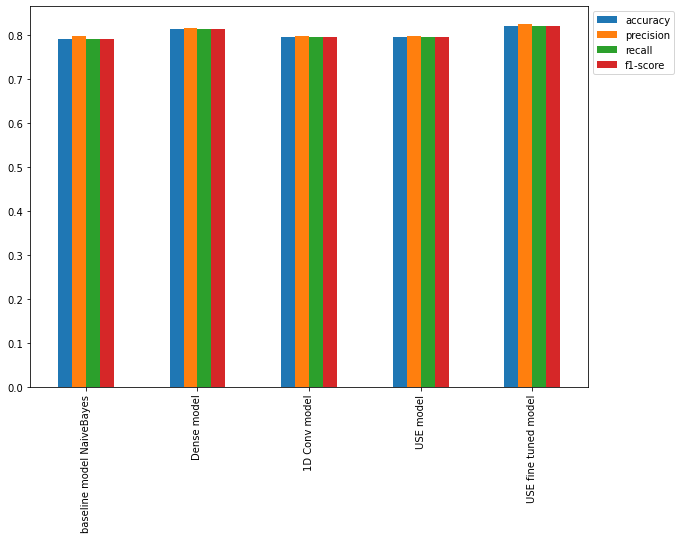

In [81]:
all_model_results['accuracy'] = all_model_results['accuracy']/100
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

**Notes:**

It seems fine tuned transfer learning with USE model is the best performing model. But dense model can still be improved and another model can be trained for longer epochs. 

In [82]:
import time

In [83]:
def pred_timer(model, samples): 
    start_time = time.perf_counter()
    model.predict(samples)
    end_time = time.perf_counter()
    total_time = end_time - start_time
    time_per_pred = total_time/len(samples)
    return total_time, time_per_pred

In [84]:
len(val_text)

3857

In [85]:
model_4_total_time, model_4_per_pred = pred_timer(model_4, val_text)
model_4_total_time, model_4_per_pred

(2.5373293590000685, 0.000657850494944275)

In [86]:
model_1_total_time, model_1_per_pred = pred_timer(model_1, val_text)
model_1_total_time, model_1_per_pred

(0.3677367029999914, 9.534267643245823e-05)

In [87]:
import matplotlib.pyplot as plt

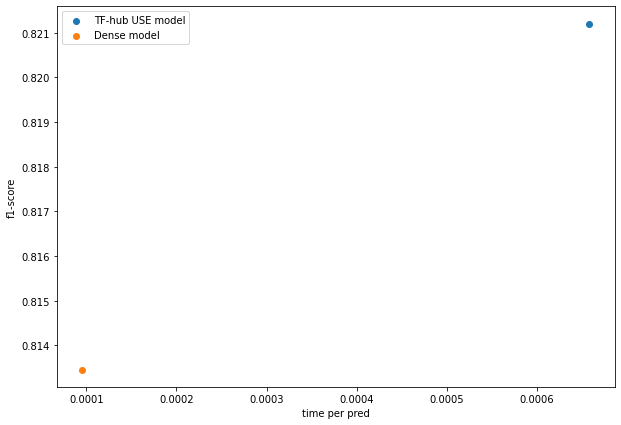

In [88]:
plt.figure(figsize=(10, 7))
plt.scatter(model_4_per_pred, model_4_results['f1-score'], label="TF-hub USE model")
plt.scatter(model_1_per_pred, model_1_results['f1-score'], label="Dense model")
plt.legend()
plt.ylabel("f1-score")
plt.xlabel("time per pred");

In [89]:
val_label

array([3, 0, 1, ..., 2, 2, 3], dtype=int8)

In [90]:
model_4_preds

array([3, 0, 2, ..., 2, 3, 3])

In [91]:
model_4_probs.max(axis=1)

array([0.3616939 , 0.6725605 , 0.9977635 , ..., 0.99556845, 0.9136373 ,
       0.99977094], dtype=float32)

In [92]:
val_df = pd.DataFrame({
    "text": val_text, 
    "true label": val_label, 
    "pred label": model_4_preds, 
    "probability": model_4_probs.max(axis=1)
})
val_df

,text,true label,pred label,probability
0,sn servicing corporation informed trustee curr...,3,3,0.361694
1,see multiple late mark clear violation right f...,0,0,0.672561
2,ive reached debt collector wont speak name soc...,1,2,0.997764
3,complaint regarding failure reimburse escrow o...,3,3,0.999730
4,made timely payment every month sometimes time...,0,0,0.953049
...,...,...,...,...
3852,missed increase escrow payment changed mailing...,3,3,0.999709
3853,transunion failed respond dispute account repo...,1,1,0.998199
3854,company purchased private consumer information...,2,2,0.995568
3855,past week alone received le call day company a...,2,3,0.913637


In [93]:
most_wrong_pred = val_df[val_df['true label'] != val_df['pred label']].sort_values("probability", ascending=False)
most_wrong_pred

,text,true label,pred label,probability
2472,applied mortgage deferment forbearance two ren...,1,3,0.999764
2249,early final stage refinancing mortgage per new...,4,3,0.999737
3321,background single family residence located ca ...,2,3,0.999724
1047,reaching missed payment incorect addition plac...,1,3,0.999719
1141,researched company auto loan refinancing found...,4,3,0.999716
...,...,...,...,...
2059,lost job due covid worked hotel applied unempl...,1,0,0.403778
2056,received phone call first national bank omaha ...,0,3,0.388467
1277,company trying make pay something knowledge ne...,2,3,0.387137
2077,account said forbearance pandemic month later ...,1,0,0.343581


In [94]:
# see 5 random samples of most wrong prediction
for i, row in most_wrong_pred[:200].sample(n=5).iterrows():
    print(f"Text: {row[0]}")
    print(f"True label: {row[1]}")
    print(f"Pred label: {row[2]}")
    print(f"Probability: {row[3]}")
    print("###########################################")

Text: derogatory credit show credit file would like removed
True label: 0
Pred label: 1
Probability: 0.9967771172523499
###########################################
Text: im vanderbilt mortgage company tn reporting mortgage credit mortgage ive disputed several time never resolved problem going year effecting financially mortgage father name ive contacted vanderbilt dozen time still action taken
True label: 1
Pred label: 3
Probability: 0.9989253878593445
###########################################
Text: know kind game collection agency trying play requested signed credit agreement receive sent copy statement statement original nonetheless requested signed credit agreement bearing signature closed account remove account account need removed account fraudulent one provided nothing signature requested information numerous time seeked legal representation consumer attorney legal advice go court show signed agreement signature host paperwork also need detail authority collect debt whether lic